Hydro power plant constraints forecast
# Module #2: Exploratory data analysis 

## Import libraries

In [2]:
import math
import pandas as pd
import numpy as np
import array as arr
from pandas import ExcelWriter
from pandas import ExcelFile
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 

## Read source file into data frame and display columns

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv("clean_dataframe.csv", parse_dates=['Date'], date_parser=dateparse, index_col="Date.1")
# rename date column 
df.rename(columns={ df.columns[0]: "Date"}, inplace=True)
# rename "Variante Prio" into "Max prod"
df.rename(columns={ df.columns[14]: "Max prod"}, inplace=True)

df.index = df["Date"]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1917 entries, 2014-04-01 to 2019-06-30
Data columns (total 23 columns):
Date                        1917 non-null datetime64[ns]
Min prod                    1917 non-null float64
Inflow lake 1 [m3]          1917 non-null float64
Inflow lake 2 [m3]          1917 non-null float64
Inflow lake 3 [m3]          1917 non-null float64
Inflow lake 4 [m3]          1917 non-null float64
Vol lake 1 [%]              1917 non-null float64
Max lake 1 [1000m3]         1917 non-null float64
Availability plant 1 [%]    1917 non-null float64
Availability plant 2 [%]    1917 non-null float64
Availability plant 3 [%]    1917 non-null float64
Availability plant 4 [%]    1917 non-null float64
SDL [MWh]                   1917 non-null float64
Weekend                     1917 non-null bool
Max prod                    1917 non-null float64
PrioH1                      1917 non-null float64
PrioP1                      1917 non-null float64
PrioH2               

In [4]:
# Read baseline for benchmark data as well
df_benchmark = pd.read_csv("baseline_dataframe.csv", parse_dates=['Date'], date_parser=dateparse, index_col="Date.1")
# Force index to be date (as provided in the first column)
df_benchmark.index = df_benchmark['Date']
df_benchmark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2014-04-01 to 2019-07-01
Data columns (total 10 columns):
Date              1918 non-null datetime64[ns]
P1 [MW]           1918 non-null float64
P2 [MW]           1918 non-null float64
P3 [MW]           1918 non-null float64
P4 [MW]           1918 non-null int64
H1 [#]            1918 non-null int64
H2 [#]            1918 non-null int64
H3 [#]            1918 non-null int64
Min Prod [MWh]    1918 non-null float64
MaxEnergy         1918 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 164.8 KB


### Check first few lines of imported file

In [5]:
df.head()

Date  Min prod  Inflow lake 1 [m3]  Inflow lake 2 [m3]  \
Date                                                                      
2014-04-01 2014-04-01       0.0                31.0                 4.0   
2014-04-02 2014-04-02     150.0                 0.0               -14.0   
2014-04-03 2014-04-03     150.0                10.0                 6.0   
2014-04-04 2014-04-04     150.0                19.0                 6.0   
2014-04-05 2014-04-05     180.0                41.0                15.0   

            Inflow lake 3 [m3]  Inflow lake 4 [m3]  Vol lake 1 [%]  \
Date                                                                 
2014-04-01               129.0               107.0         0.16467   
2014-04-02               148.0               116.0         0.15557   
2014-04-03               132.0               118.0         0.14765   
2014-04-04               150.0               118.0         0.13716   
2014-04-05               148.0               124.0         0.13091   

            Max lake 1 [1000m3]  Availability plant 1 [%]  \
Date                                                        
2014-04-01              30000.0                       1.0   
2014-04-02              30000.0                       1.0   
2014-04-03              30000.0                       1.0   
2014-04-04              30000.0                       1.0   
2014-04-05              30000.0                       1.0   

            Availability plant 2 [%]  ...  Weekend  Max prod  PrioH1  PrioP1  \
Date                                  ...                                      
2014-04-01                       1.0  ...    False     902.4     4.0    73.8   
2014-04-02                       1.0  ...    False     902.4     4.0    73.8   
2014-04-03                       1.0  ...    False     902.4     4.0    73.8   
2014-04-04                       1.0  ...    False     902.4     4.0    73.8   
2014-04-05                       1.0  ...     True     897.6     4.0    72.6   

            PrioH2  PrioP2  PrioH3  PrioP3  PrioH4  PrioP4  
Date                                                        
2014-04-01     4.0    66.0     8.0    42.9     0.0     0.0  
2014-04-02     4.0    66.0     8.0    42.9     0.0     0.0  
2014-04-03     4.0    66.0     8.0    42.9     0.0     0.0  
2014-04-04     4.0    66.0     8.0    42.9     0.0     0.0  
2014-04-05     4.0    66.0     8.0    42.9     0.0     0.0  

[5 rows x 23 columns]

## Visual data analysis
### Timeseries plots

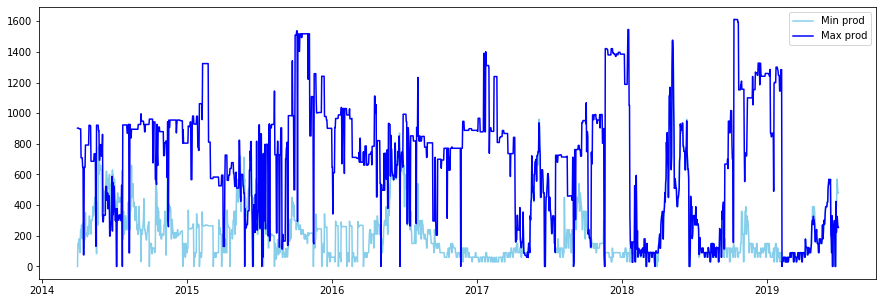

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
  
# Plot daily target features time series: min and max production
fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size  
plt.plot('Min prod', data=df, color='skyblue')
plt.plot('Max prod', data=df, color='blue')
plt.legend()

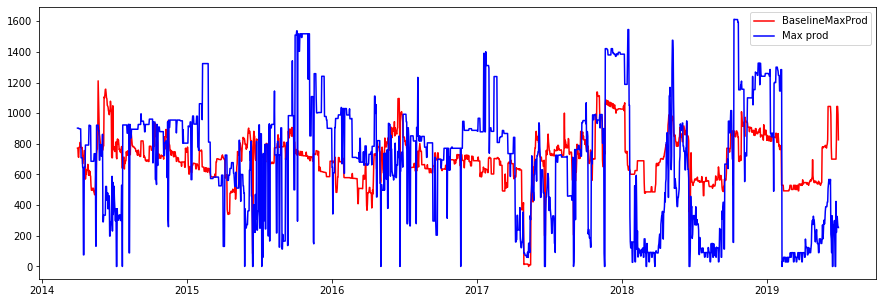

In [8]:
#Plot maximum along with baseline
# Plot minimum production baseline as well
df["BaselineMaxProd"] = df_benchmark["MaxEnergy"]
plt.plot('BaselineMaxProd', data=df, color='red')
plt.plot('Max prod', data=df, color='blue')
plt.legend()

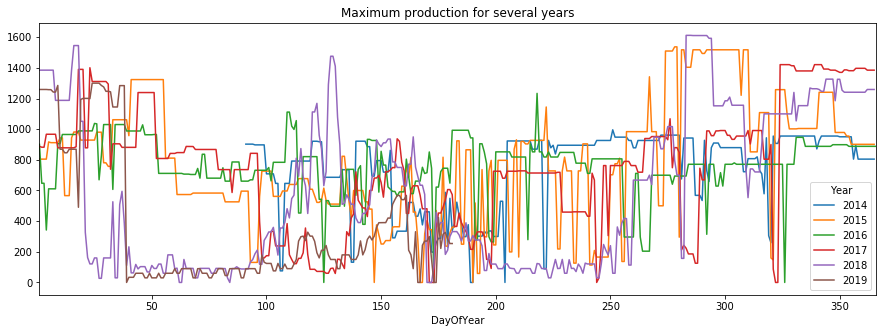

In [9]:
# all value plotted on one year
VariantPrio = pd.DataFrame(df.loc[:, ['Date','Max prod']])
VariantPrio.index = VariantPrio['Date']

# Add the year and day of years features, then pivot to have one column of data per year (ronw = day of year)
VariantPrio["Year"] = VariantPrio.index.year
VariantPrio["DayOfYear"] = VariantPrio.index.dayofyear
 
YearVariantPrio = VariantPrio.pivot(index='DayOfYear', columns='Year', values='Max prod')

YearVariantPrio.plot(title="Maximum production for several years")

### Autocorellation function plot (ACF)
Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

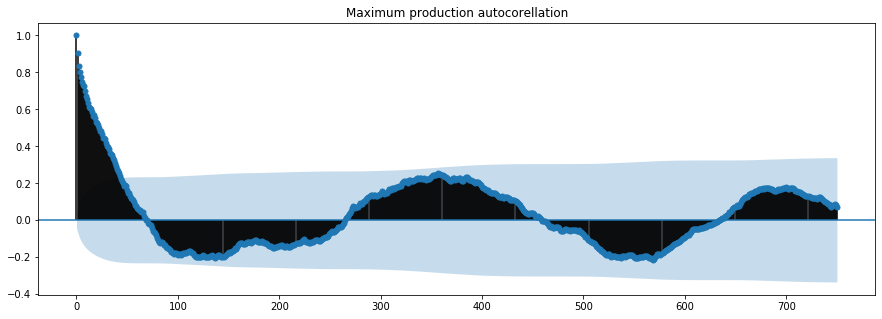

In [10]:
# plot correlogram
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Max prod'], lags=750, title ="Maximum production autocorellation")
pyplot.show()

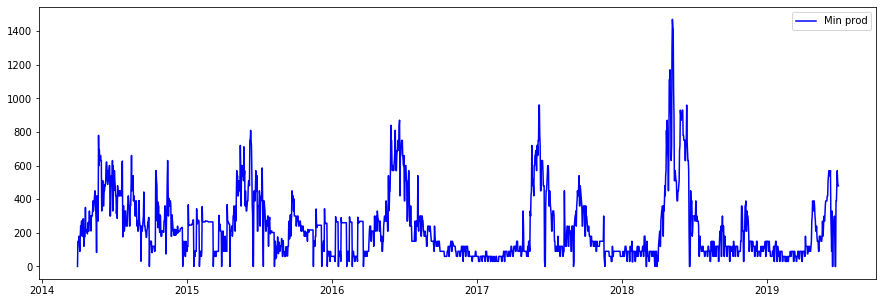

In [11]:
# Plot minimum production
plt.plot('Min prod', data=df, color='blue')
plt.legend()

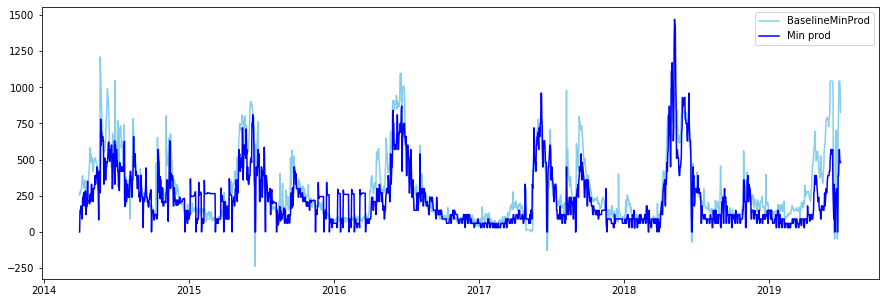

In [12]:
# Plot minimum production baseline as well
df["BaselineMinProd"] = df_benchmark["Min Prod [MWh]"]
plt.plot('BaselineMinProd', data=df, color='skyblue')
plt.plot('Min prod', data=df, color='blue')
plt.legend()

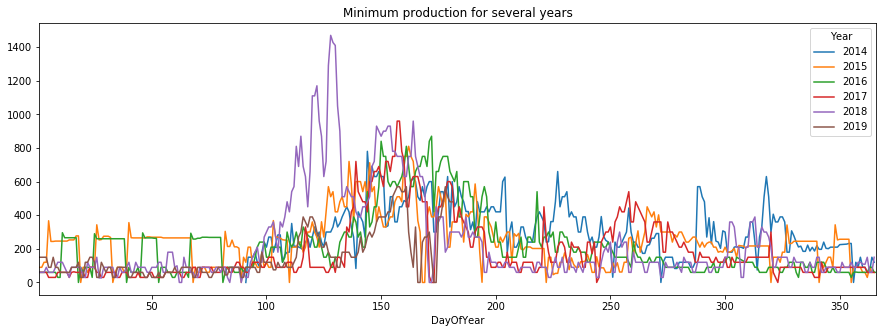

In [43]:
# all value plotted on one year
MindProd = pd.DataFrame(df.loc[:, ['Date','Min prod']])
MindProd.index = MindProd['Date']

# Add the year and day of years features, then pivot to have one column of data per year (ronw = day of year)
MindProd["Year"] = MindProd.index.year
MindProd["DayOfYear"] = MindProd.index.dayofyear
 
YearMindProd = MindProd.pivot(index='DayOfYear', columns='Year', values='Min prod')

YearMindProd.plot(title="Minimum production for several years")

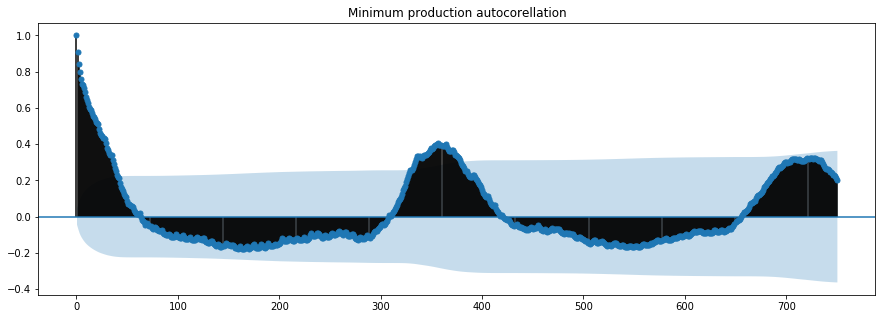

In [13]:
# plot correlogram
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Min prod'], lags=750, title ="Minimum production autocorellation")
pyplot.show()


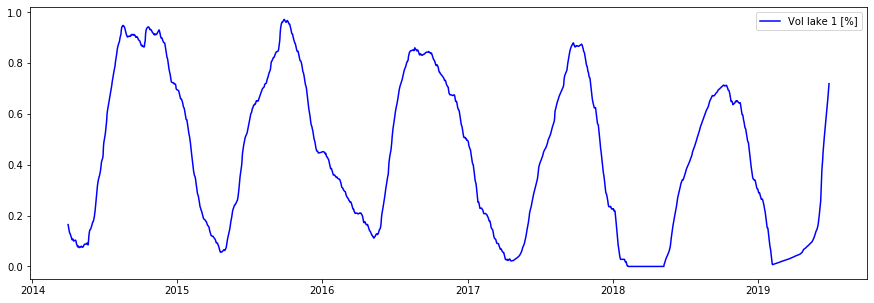

In [14]:
plt.plot('Vol lake 1 [%]', data=df, color='blue')
plt.legend()

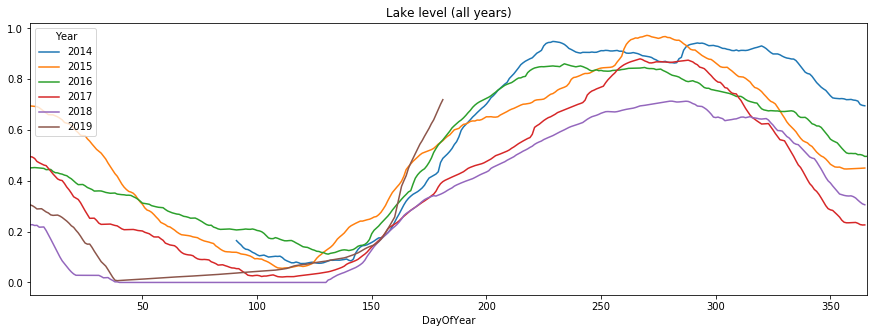

In [15]:
# all value plotted on one year
Lakelevel = pd.DataFrame(df.loc[:, ['Date','Vol lake 1 [%]']])
Lakelevel.index = Lakelevel['Date']

# Add the year and day of years features, then pivot to have one column of data per year (ronw = day of year)
Lakelevel["Year"] = Lakelevel.index.year
Lakelevel["DayOfYear"] = Lakelevel.index.dayofyear
 
YearLakelevel = Lakelevel.pivot(index='DayOfYear', columns='Year', values='Vol lake 1 [%]')

YearLakelevel.plot(title="Lake level (all years)")

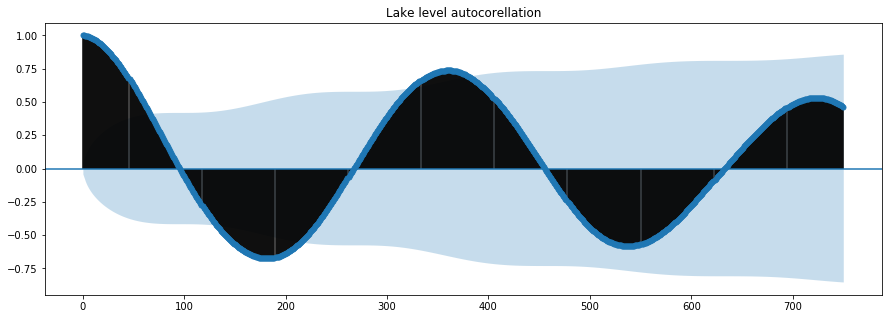

In [16]:
# plot correlogram
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Vol lake 1 [%]'], lags=750, title ="Lake level autocorellation")
pyplot.show()


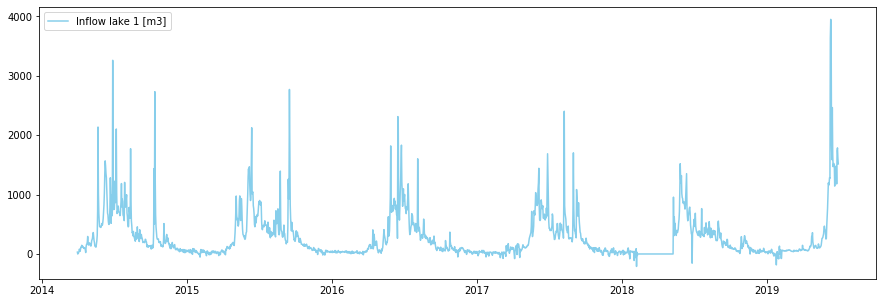

In [17]:
plt.plot('Inflow lake 1 [m3]', data=df, color='skyblue')
plt.legend()

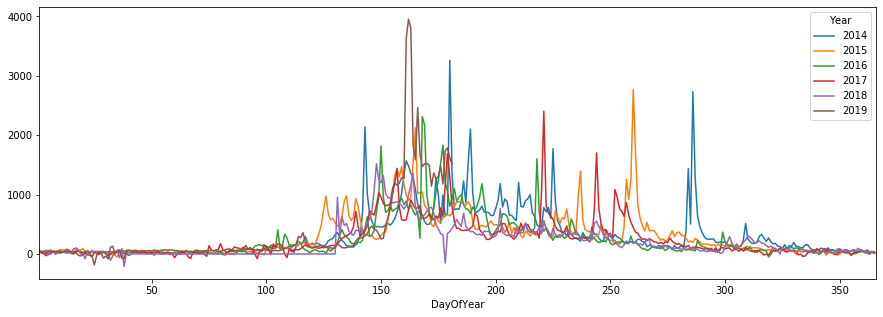

In [18]:
# all value plotted on one year
Inflows = pd.DataFrame(df.loc[:, ['Date','Inflow lake 1 [m3]']])
Inflows.index = Inflows['Date']

# Add the year and day of years features, then pivot to have one column of data per year (ronw = day of year)
Inflows["Year"] = Inflows.index.year
Inflows["DayOfYear"] = Inflows.index.dayofyear
 
YearInflows = Inflows.pivot(index='DayOfYear', columns='Year', values='Inflow lake 1 [m3]')

YearInflows.plot()

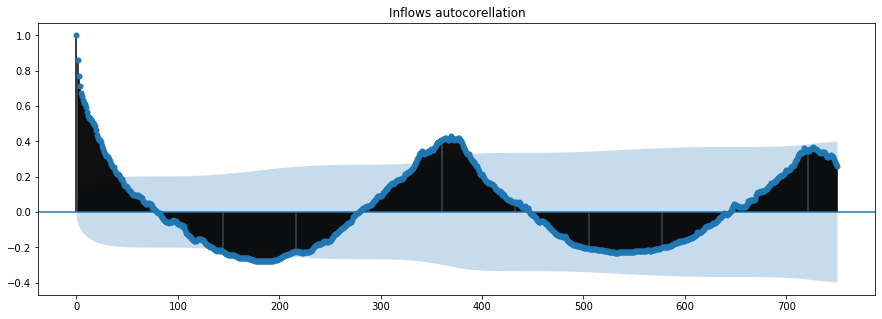

In [19]:
# plot correlogram
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Inflow lake 1 [m3]'], lags=750, title ="Inflows autocorellation")
pyplot.show()

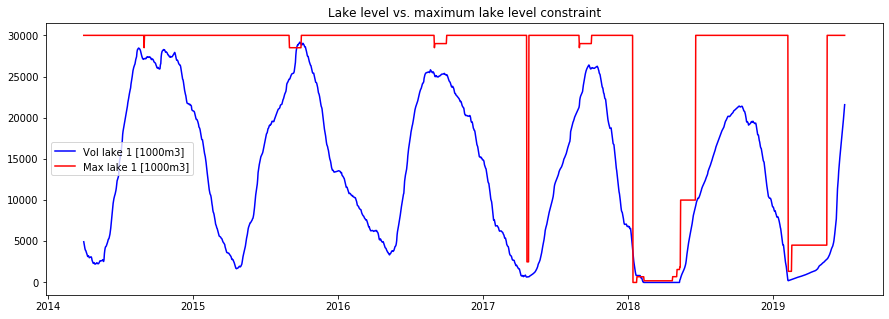

In [20]:
df['Vol lake 1 [1000m3]'] = df['Vol lake 1 [%]'] * 30000
plt.plot('Vol lake 1 [1000m3]', data=df, color='blue' )
plt.plot('Max lake 1 [1000m3]', data=df, color='red' )

plt.title(label = "Lake level vs. maximum lake level constraint")
plt.legend()

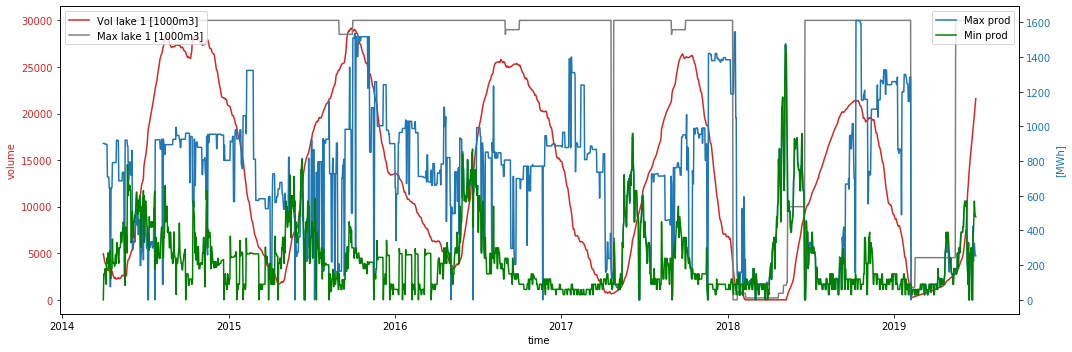

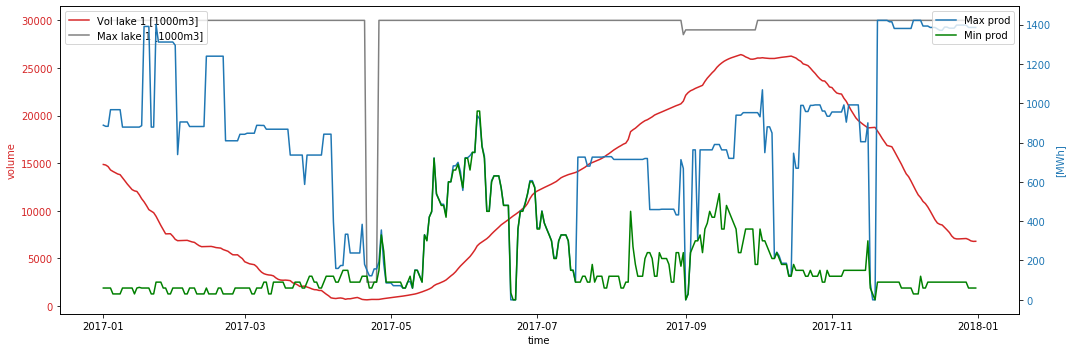

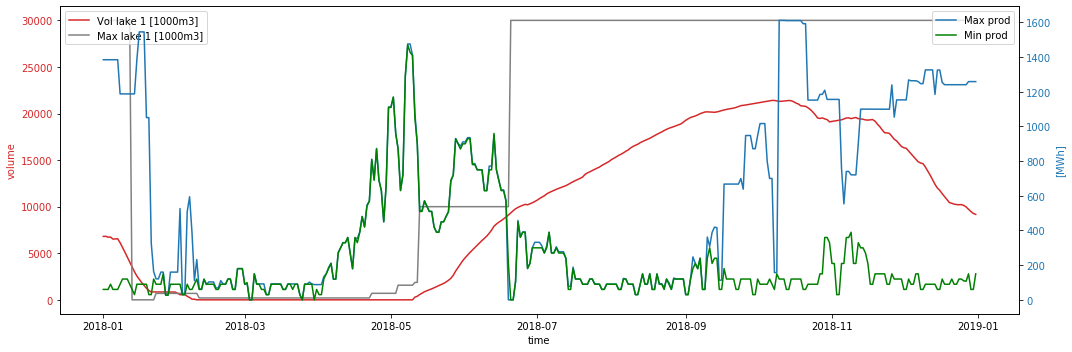

In [21]:
# same with min and max prod
df["Year"] = df.index.year

for df_plot in [df,df[df["Year"]==2017], df[df["Year"]==2018]]:
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel('volume', color=color)
    ax1.plot('Vol lake 1 [1000m3]', data=df_plot, color=color)
    plt.plot('Max lake 1 [1000m3]', data=df_plot, color='grey' )
    ax1.tick_params(axis='y', labelcolor=color)
    plt.legend(loc='upper left')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('[MWh]', color=color)  # we already handled the x-label with ax1
    ax2.plot('Max prod', data=df_plot, color=color)
    ax2.plot('Min prod', data=df_plot, color='green')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.legend(loc='upper right')
    plt.show()


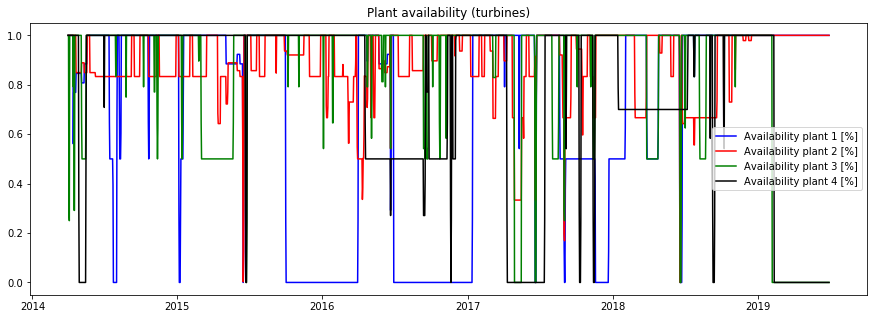

In [22]:
# plot maximum power turbine constraints 
plt.plot('Availability plant 1 [%]', data=df, color='blue' )
plt.plot('Availability plant 2 [%]', data=df, color='red' )
plt.plot('Availability plant 3 [%]', data=df, color='green' )
plt.plot('Availability plant 4 [%]', data=df, color='black' )

plt.title(label = "Plant availability (turbines)")
plt.legend()

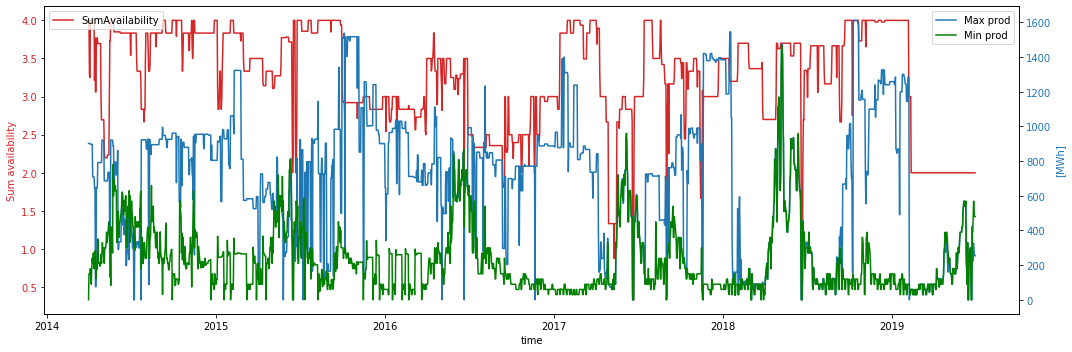

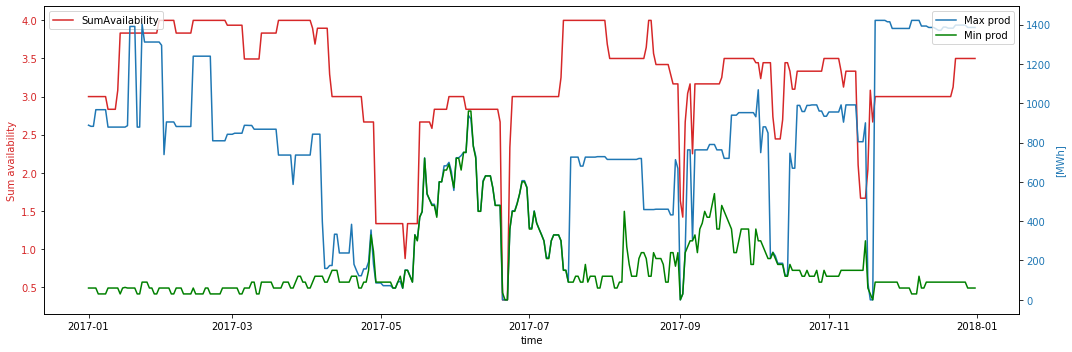

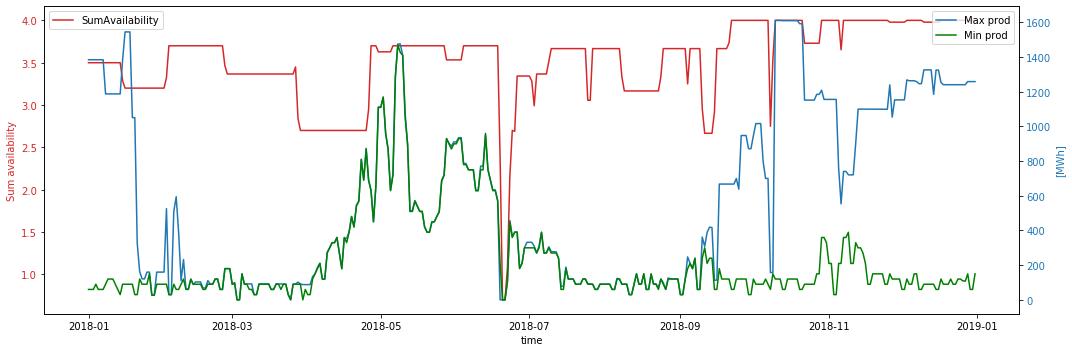

In [23]:
# plot max availability of all turbines vs max production

df["SumAvailability"] = 0
for i in range (1,4+1):
    df["SumAvailability"] += df['Availability plant '+str(i)+' [%]']

# plot sum of turbine constraints vs max production
#plt.plot('SumAvailability', data=df, color='blue' )
#plt.title(label = "Sum of all plant availabilities (turbines)")
#plt.legend()

for df_plot in [df,df[df["Year"]==2017], df[df["Year"]==2018]]:
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel('Sum availability', color=color)
    ax1.plot('SumAvailability', data=df_plot, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.legend(loc='upper left')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('[MWh]', color=color)  # we already handled the x-label with ax1
    ax2.plot('Max prod', data=df_plot, color=color)
    ax2.plot('Min prod', data=df_plot, color='green')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.legend(loc='upper right')
    plt.show()
    

### Identify inconsistent data: days when minimum production constraint is larger than maxium authorised


In [31]:
# Events when min production is lower than max allowed production, torance of 50 (84 events)
NRGThreshold = 50
MinGtMax= df[df['Min prod']-df['Max prod'] >NRGThreshold ][['Min prod','Max prod']]

print ("Number of inconsistent values (min prod > max prod): %d" %(MinGtMax.size))
MinGtMax.head()

Number of inconsistent values (min prod > max prod): 208


Min prod  Max prod
Date                          
2014-04-16     283.0      75.6
2014-05-17     330.0     132.0
2014-05-18     270.0     132.0
2014-06-04     510.0     291.0
2014-06-05     360.0     291.0

In [95]:
# define input features
df_input_features = df.filter(['Inflow lake 1 [m3]', \
       'Inflow lake 2 [m3]', 'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]', \
       'Vol lake 1 [%]', 'Max lake 1 [1000m3]', 'Availability plant 1 [%]', \
       'Availability plant 2 [%]', 'Availability plant 3 [%]', \
       'Availability plant 4 [%]', 'Weekend'], axis=1)

# force Weekend column to numeric value
df_input_features['Weekend'] = df_analysis['Weekend'] .astype(int)
# display simple stasticss of data frame
display(round(df_input_features.describe(),2))

Inflow lake 1 [m3]  Inflow lake 2 [m3]  Inflow lake 3 [m3]  \
count             1917.00             1917.00             1917.00   
mean               279.38               55.39              172.24   
std                393.60               89.28              155.39   
min               -210.00             -482.00             -208.00   
25%                 42.00                8.70               69.00   
50%                119.00               31.00              119.40   
75%                376.00               75.00              228.00   
max               3951.60              471.00              985.60   

       Inflow lake 4 [m3]  Vol lake 1 [%]  Max lake 1 [1000m3]  \
count             1917.00         1917.00              1917.00   
mean                86.18            0.44             26305.37   
std                100.92            0.31              9228.22   
min               -224.00            0.00                 0.00   
25%                 37.30            0.15             30000.00   
50%                 59.30            0.43             30000.00   
75%                116.00            0.70             30000.00   
max               1349.70            0.97             30000.00   

       Availability plant 1 [%]  Availability plant 2 [%]  \
count                   1917.00                   1917.00   
mean                       0.71                      0.89   
std                        0.42                      0.14   
min                       -0.00                      0.00   
25%                        0.50                      0.83   
50%                        1.00                      0.94   
75%                        1.00                      1.00   
max                        1.00                      1.00   

       Availability plant 3 [%]  Availability plant 4 [%]  Weekend  
count                   1917.00                   1917.00  1917.00  
mean                       0.86                      0.77     0.29  
std                        0.31                      0.36     0.45  
min                        0.00                      0.00     0.00  
25%                        1.00                      0.50     0.00  
50%                        1.00                      1.00     0.00  
75%                        1.00                      1.00     1.00  
max                        1.00                      1.00     1.00

In [82]:
# define output features
df_output_features = df.filter(['Min prod','Max prod',  \
                               'PrioH1', 'PrioP1', 'PrioH2', 'PrioP2', \
                               'PrioH3', 'PrioP3','PrioH4', 'PrioP4' ], axis=1)

# display simple stasticss of data frame
display(round(df_output_features.describe(),2))

Min prod  Max prod   PrioH1   PrioP1   PrioH2   PrioP2   PrioH3  \
count   1917.00   1917.00  1917.00  1917.00  1917.00  1917.00  1917.00   
mean     228.44    696.30     4.68    59.03     4.87    42.46     3.86   
std      194.11    389.93     3.32    16.40     3.95    21.27     4.31   
min        0.00      0.00     0.00     0.00     0.00     0.00     0.00   
25%       90.00    362.10     2.00    52.50     2.00    27.00     0.00   
50%      180.00    748.50     4.00    65.40     4.00    47.40     2.00   
75%      300.00    933.60     7.00    69.90     7.00    61.50     8.00   
max     1470.00   1612.17    24.00    84.00    22.00    75.00    24.00   

        PrioP3   PrioH4   PrioP4  
count  1917.00  1917.00  1917.00  
mean     24.06     2.52     8.06  
std      21.59     4.16    14.10  
min       0.00     0.00     0.00  
25%       0.00     0.00     0.00  
50%      24.00     0.00     0.00  
75%      45.00     4.00    10.50  
max      68.65    20.00    60.30

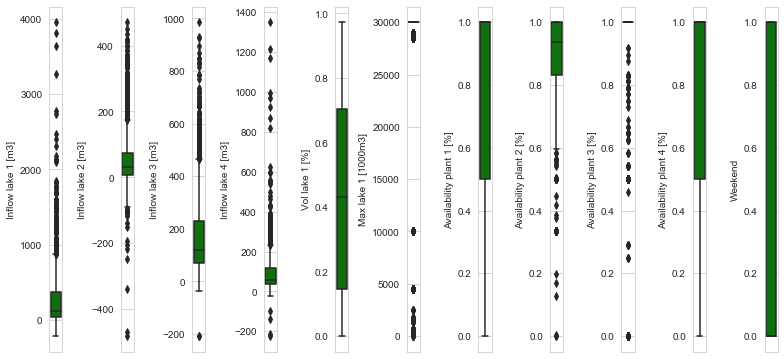

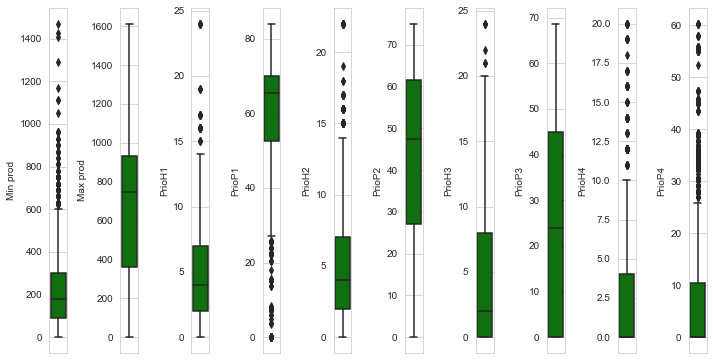

In [84]:
for df_plot in [df_input_features, df_output_features]:
    l = df_plot.columns.values
    number_of_columns=len(df_input_features.columns)
    number_of_rows = len(l)-1/number_of_columns
    plt.figure(figsize=(number_of_columns,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.set_style('whitegrid')
        sns.boxplot(df_plot[l[i]],color='green',orient='v')
        plt.tight_layout()

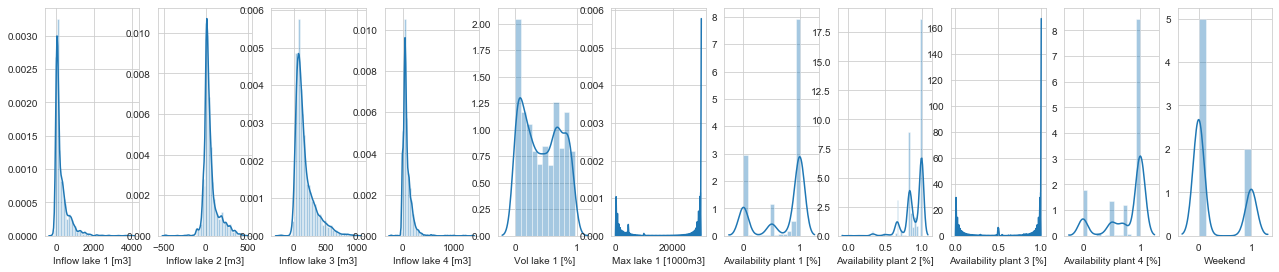

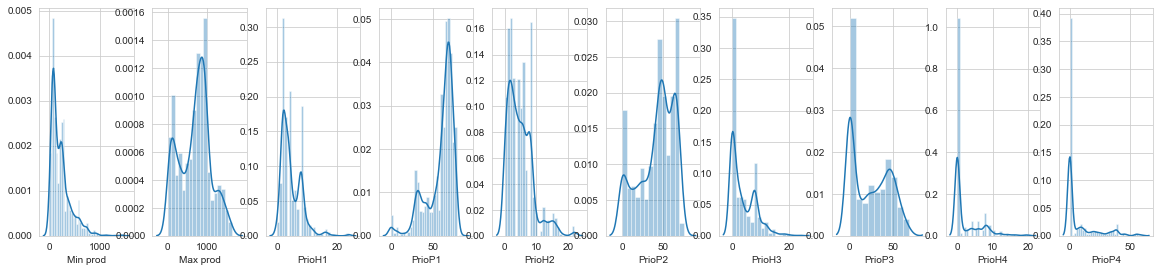

In [88]:
for df_plot in [df_input_features, df_output_features]:
    l = df_plot.columns.values
    number_of_columns=len(df_input_features.columns)
    number_of_rows = len(l)-1/number_of_columns
    plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.distplot(df_plot[l[i]],kde=True) 

In [116]:
df.columns

Index(['Date', 'Min prod', 'Inflow lake 1 [m3]', 'Inflow lake 2 [m3]',
       'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]', 'Vol lake 1 [%]',
       'Max lake 1 [1000m3]', 'Availability plant 1 [%]',
       'Availability plant 2 [%]', 'Availability plant 3 [%]',
       'Availability plant 4 [%]', 'SDL [MWh]', 'Weekend', 'Max prod',
       'PrioH1', 'PrioP1', 'PrioH2', 'PrioP2', 'PrioH3', 'PrioP3', 'PrioH4',
       'PrioP4', 'BaselineMaxProd', 'Vol lake 1 [1000m3]', 'Year',
       'SumAvailability'],
      dtype='object')

In [117]:
# define sub set for statistical analysis
df_analysis = df.filter(['Min prod', 'Max prod', \
       'PrioH1', 'PrioP1', 'PrioH2', 'PrioP2', 'PrioH3', 'PrioP3', 'PrioH4','PrioP4', \
       'Inflow lake 1 [m3]', 'Inflow lake 2 [m3]', 'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]', \
       'Vol lake 1 [%]', 'Max lake 1 [1000m3]', 'Availability plant 1 [%]', \
       'Availability plant 2 [%]', 'Availability plant 3 [%]', \
       'Availability plant 4 [%]', 'SumAvailability','Weekend'], axis=1)

# force Weekend column to numeric value
df_analysis['Weekend'] = df_analysis['Weekend'] .astype(int)

In [33]:
# display simple stasticss of data frame
display(round(df_analysis.describe(),2))

Min prod  Inflow lake 1 [m3]  Inflow lake 2 [m3]  Inflow lake 3 [m3]  \
count   1917.00             1917.00             1917.00             1917.00   
mean     228.44              279.38               55.39              172.24   
std      194.11              393.60               89.28              155.39   
min        0.00             -210.00             -482.00             -208.00   
25%       90.00               42.00                8.70               69.00   
50%      180.00              119.00               31.00              119.40   
75%      300.00              376.00               75.00              228.00   
max     1470.00             3951.60              471.00              985.60   

       Inflow lake 4 [m3]  Vol lake 1 [%]  Max lake 1 [1000m3]  \
count             1917.00         1917.00              1917.00   
mean                86.18            0.44             26305.37   
std                100.92            0.31              9228.22   
min               -224.00            0.00                 0.00   
25%                 37.30            0.15             30000.00   
50%                 59.30            0.43             30000.00   
75%                116.00            0.70             30000.00   
max               1349.70            0.97             30000.00   

       Availability plant 1 [%]  Availability plant 2 [%]  \
count                   1917.00                   1917.00   
mean                       0.71                      0.89   
std                        0.42                      0.14   
min                       -0.00                      0.00   
25%                        0.50                      0.83   
50%                        1.00                      0.94   
75%                        1.00                      1.00   
max                        1.00                      1.00   

       Availability plant 3 [%]  Availability plant 4 [%]  Weekend  
count                   1917.00                   1917.00  1917.00  
mean                       0.86                      0.77     0.29  
std                        0.31                      0.36     0.45  
min                        0.00                      0.00     0.00  
25%                        1.00                      0.50     0.00  
50%                        1.00                      1.00     0.00  
75%                        1.00                      1.00     1.00  
max                        1.00                      1.00     1.00

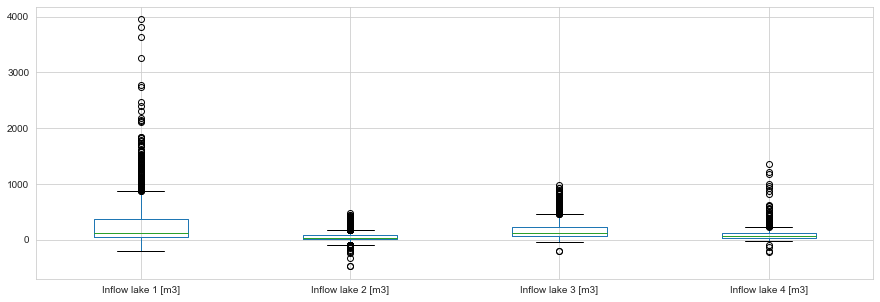

In [85]:
# Inflows: draw boxplots
df_analysis.boxplot(column= [ 'Inflow lake 1 [m3]', \
       'Inflow lake 2 [m3]', 'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]'])

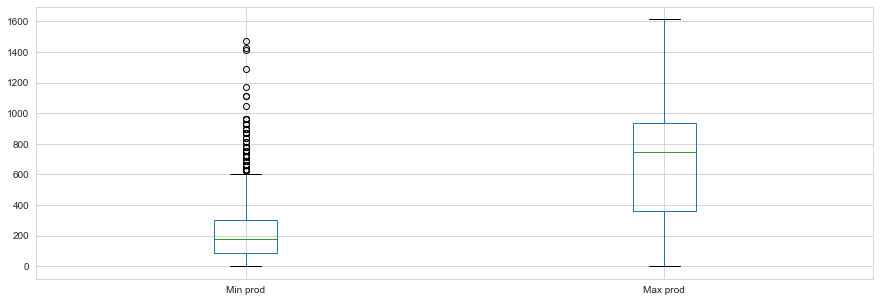

In [86]:
# Draw boxplots for daily energy min and max
df_analysis.boxplot(column= [ 'Min prod','Max prod'])

Text(0.5, 1.0, 'Minimum Production')

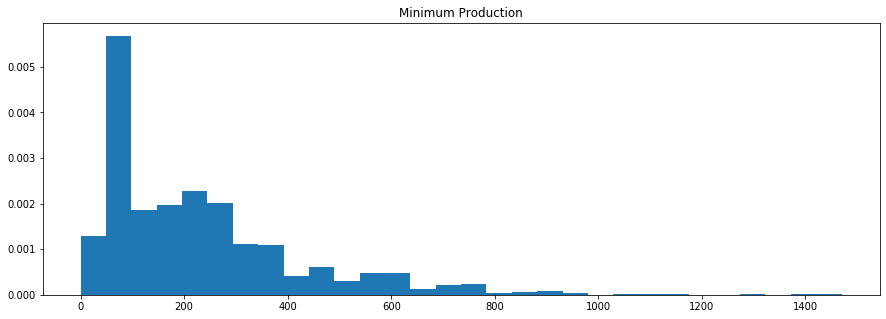

In [27]:
plt.hist(df["Min prod"], density=True, bins=30)
plt.title('Minimum Production distribution')

Text(0.5, 1.0, 'Maximum production distribution')

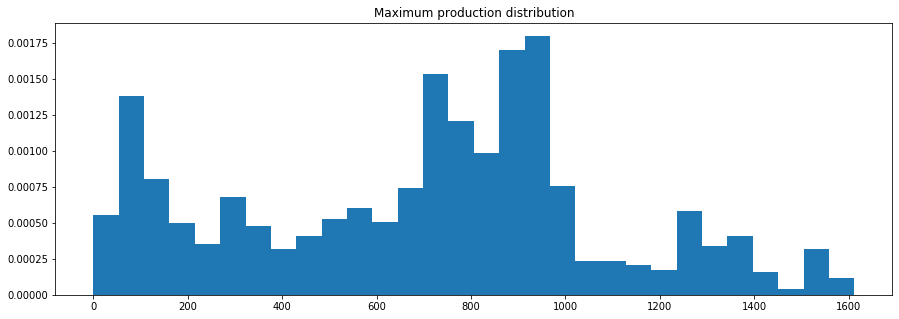

In [47]:
plt.hist(df['Max prod'], density=True, bins=30)
plt.title('Maximum production distribution')

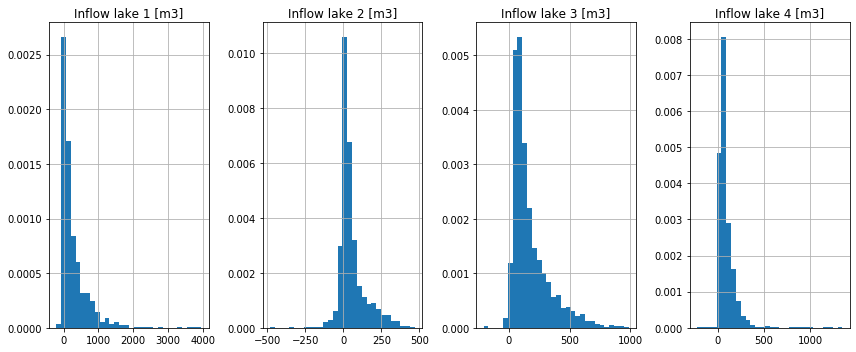

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,5))  # 1 rows, 4 columns
for i in range(1,5):  
    df.hist(column ="Inflow lake "+str(i)+" [m3]", density=True, bins=30, ax=ax[i-1])
    
plt.tight_layout()     

<Figure size 1584x1584 with 0 Axes>

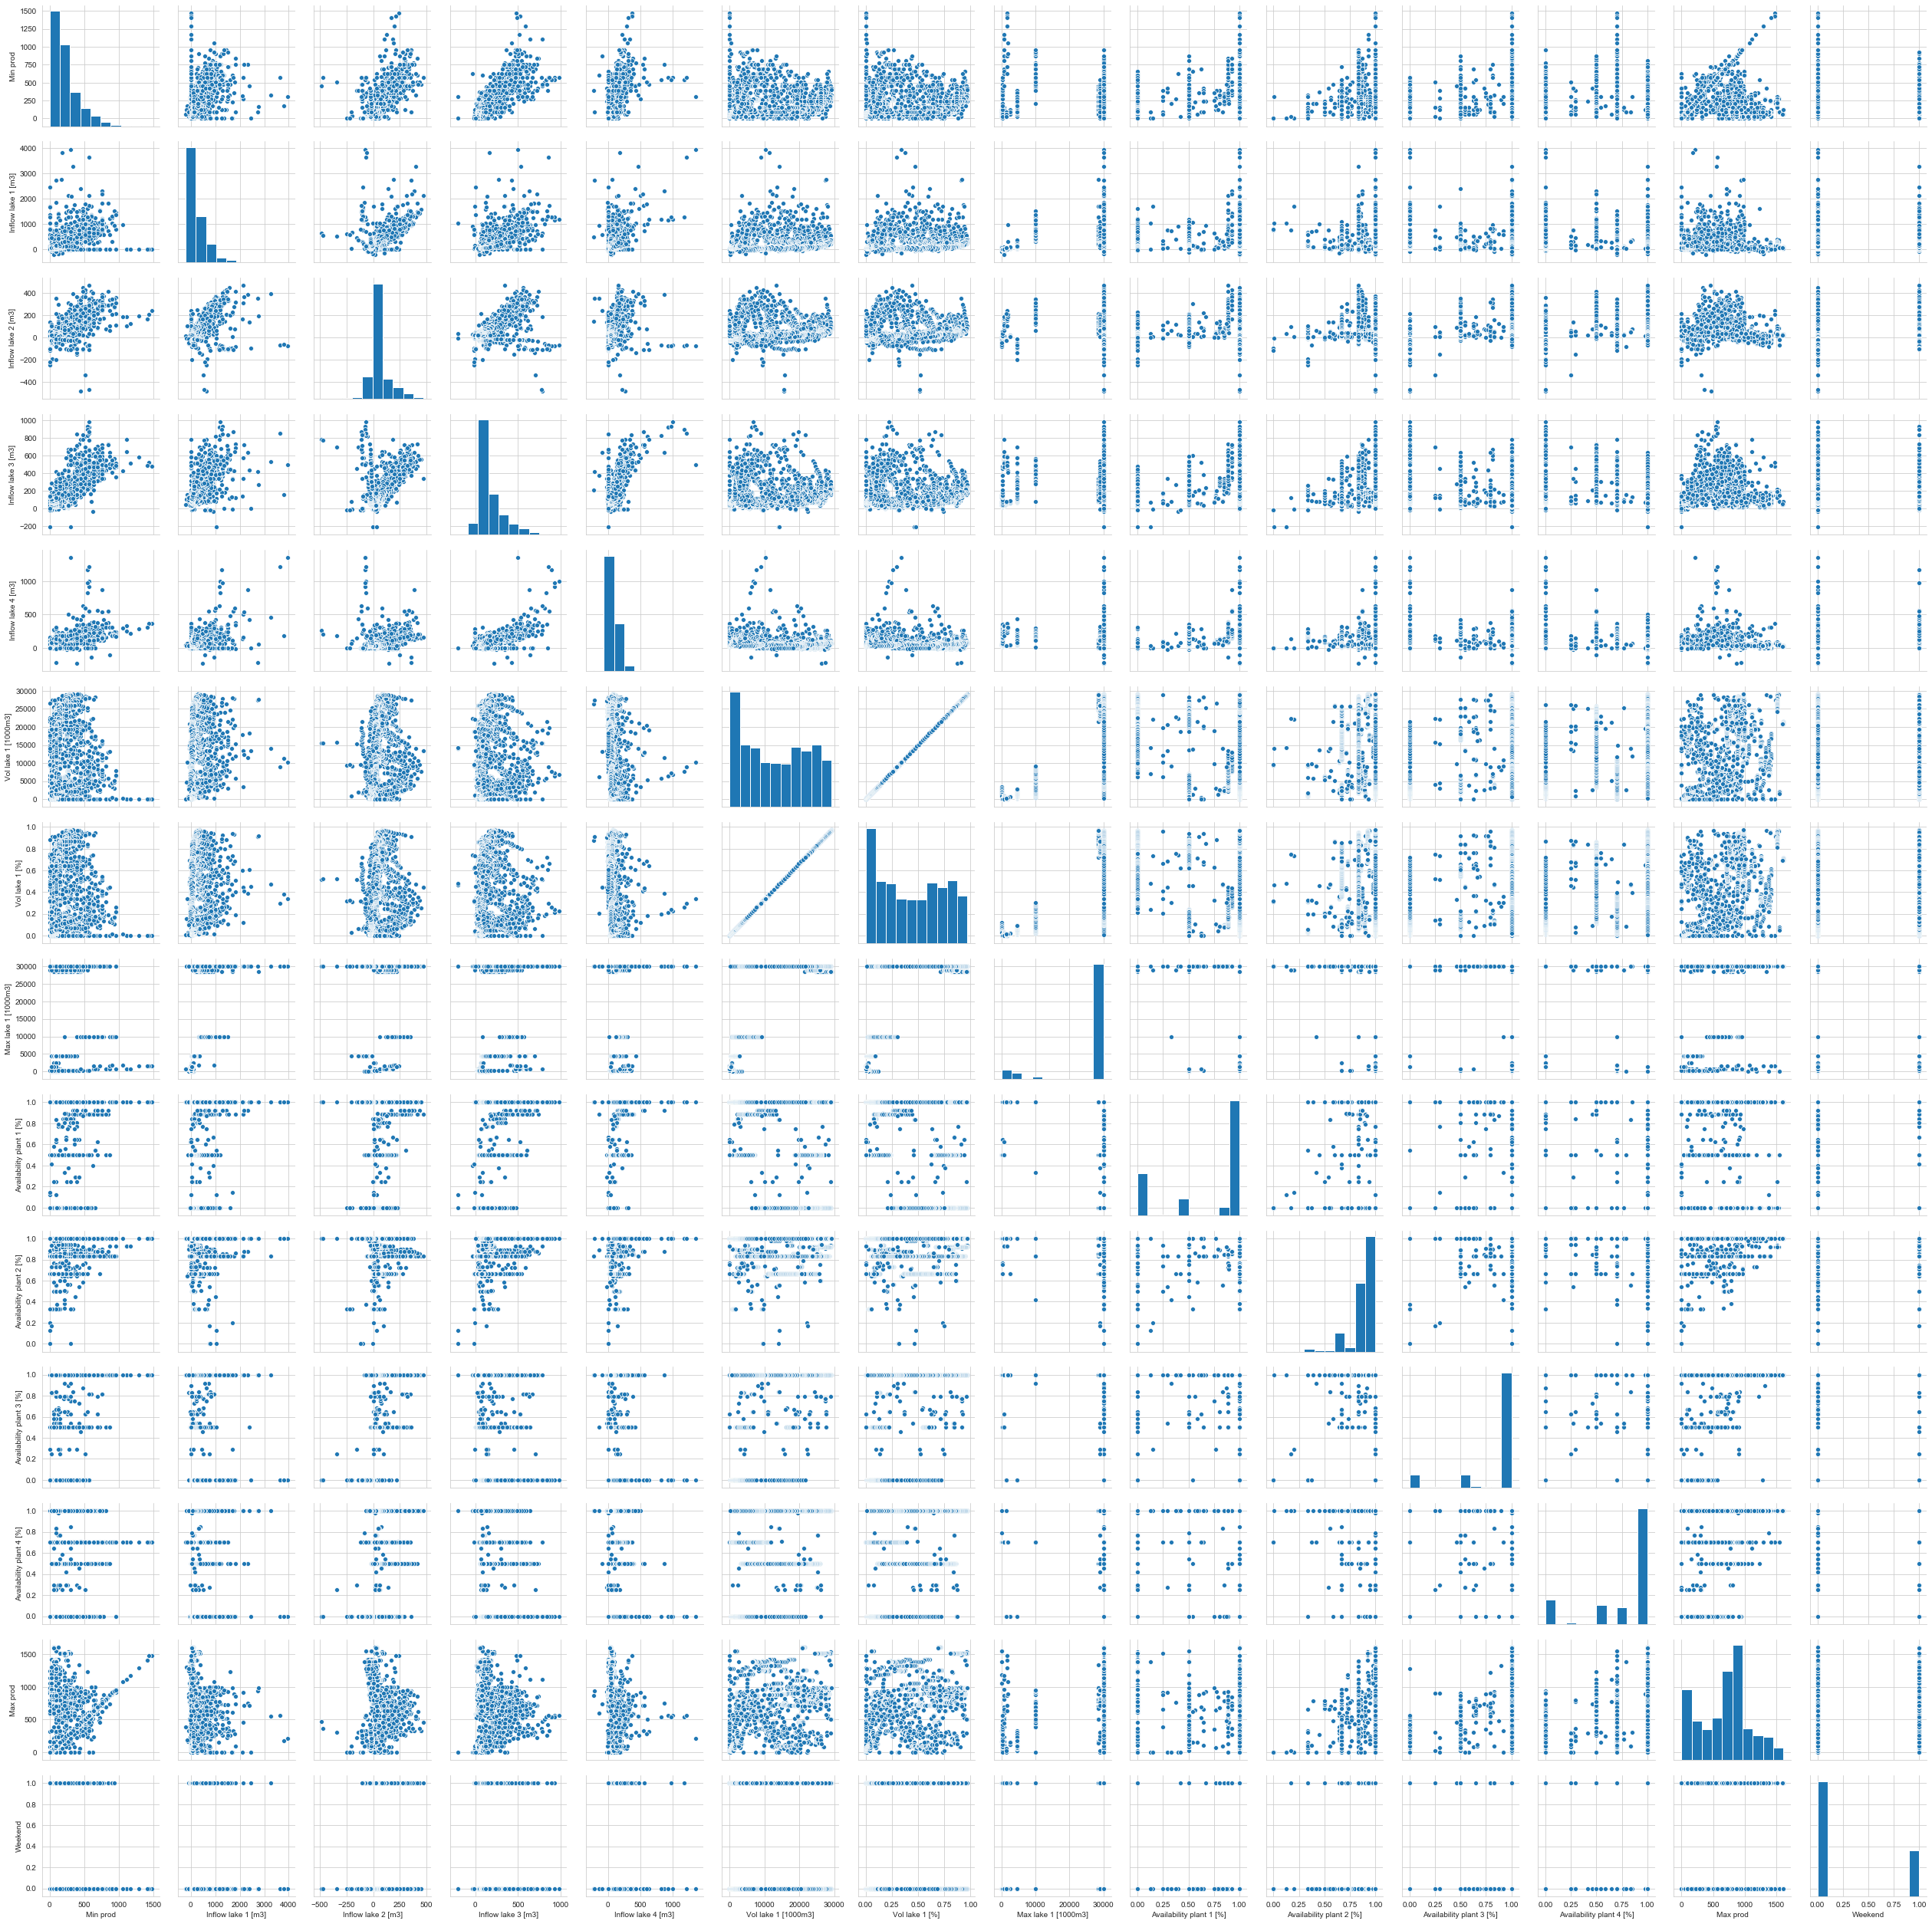

In [112]:
## %matplotlib inline
# Basic correlogram
plt.figure(figsize=(22, 22))
sns.pairplot(df_analysis)

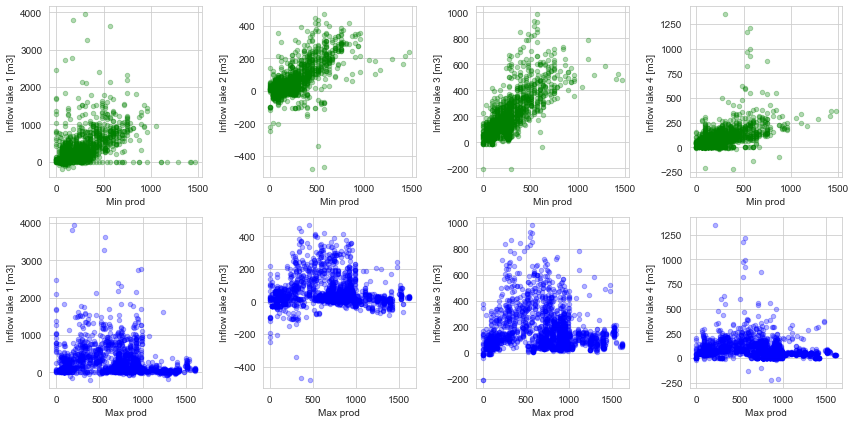

In [96]:
# display scatter plots of output features as a function of lake levels

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12,6))  # 2 rows, 4 columns
#loop over lakes (1 to 4)
for i in range(1,4+1):    
    # Plot min production in green color
    df.plot.scatter(x='Min prod', y='Inflow lake '+str(i)+' [m3]', ax=ax[0, i-1],  c='g', alpha=0.3)
    # Plot Variante Prio max production in red color
    df.plot.scatter(x='Max prod', y='Inflow lake '+str(i)+' [m3]', ax=ax[1, i-1],  c='b', alpha=0.3)

plt.tight_layout() 

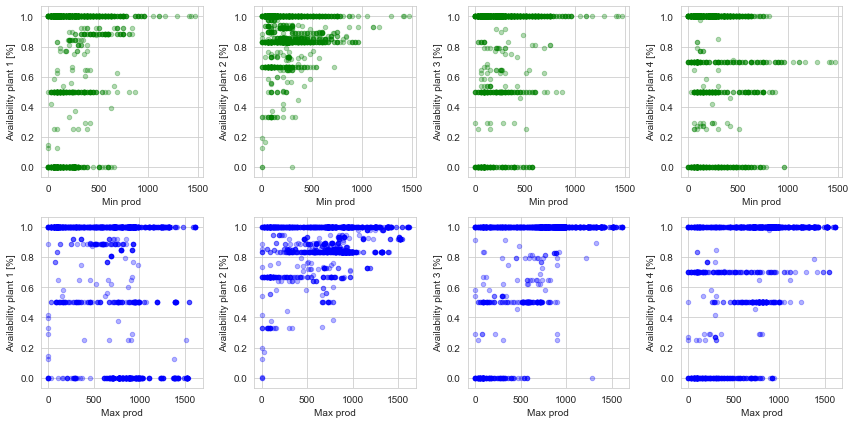

In [154]:
# display scatter plots of output features as a function of plants availability

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12,6))  # 2 rows, 4 columns
#loop over plants (1 to 4)
for i in range(1,4+1):    
    # Plot min production in green color
    df.plot.scatter(x='Min prod', y='Availability plant '+str(i)+' [%]', ax=ax[0, i-1],  c='g', alpha=0.3)
    # Plot Variante Prio max production in red color
    df.plot.scatter(x='Max prod', y='Availability plant '+str(i)+' [%]', ax=ax[1, i-1],  c='b', alpha=0.3)

plt.tight_layout() 

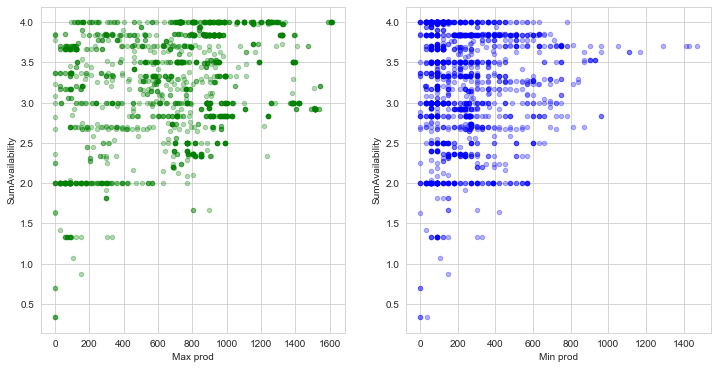

In [111]:
## plot min and max production vs total turbine availability
fig, ax = plt.subplots( ncols=2, figsize=(12,6))  # 1 rows, 2 columns
df.plot.scatter(x='Max prod', y='SumAvailability',  ax=ax[0], c='g', alpha=0.3)
df.plot.scatter(x='Min prod', y='SumAvailability',  ax=ax[1], c='b', alpha=0.3)

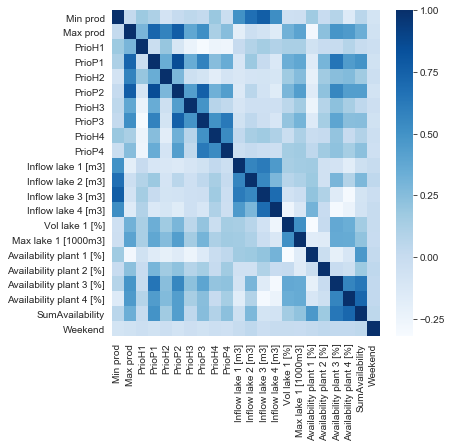

In [119]:
# correlation maxtix
plt.figure(figsize=(6,6))
sns.heatmap(df_analysis.corr(),cmap='Blues',annot=False) 

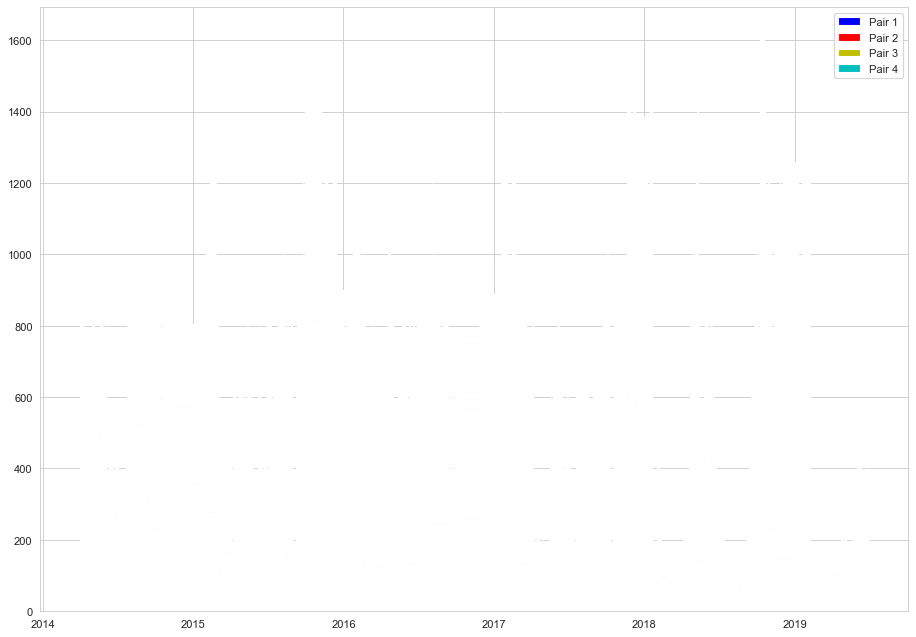

In [87]:
# Analysis of power values (4 pairs)
# plot stacked graph, with different colors for each pairs
FromPoint = 0
ToPoint = round(len(df.index))
df_plot = df.iloc[FromPoint:ToPoint, :] 

# Compute prediction energy by pair, i.e. nb of hours times power (from 1 to 8 pairs)
for i in range(1, 4+1):
    HourIndex = "PrioH"+str(i)
    PwrIndex  = "PrioP"+str(i)
    PowerVar  = df[HourIndex]*df[PwrIndex]
    # Add column to dataframe
    New_Col_Name = "EnergyPair"+str(i)
    df_plot.insert(len(df.columns),New_Col_Name, PowerVar)
    
fig=plt.figure(figsize=(14, 10), dpi= 80, edgecolor='k')
plt.bar(df_plot.index, df_plot.EnergyPair1, color = 'b', label="Pair 1")
plt.bar(df_plot.index, df_plot.EnergyPair2, color = 'r', bottom = df_plot.EnergyPair1, label="Pair 2")
plt.bar(df_plot.index, df_plot.EnergyPair3, color = 'y', bottom = df_plot.EnergyPair1+df_plot.EnergyPair2, label="Pair 3")
plt.bar(df_plot.index, df_plot.EnergyPair4, color = 'c', bottom = df_plot.EnergyPair1+df_plot.EnergyPair2+df_plot.EnergyPair3, label="Pair 4")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# same but use shades of colour to represent power intensity
import matplotlib.colors as colors
import matplotlib.cm as cm

norm = colors.Normalize(0, df_plot.PrioP1.max())
color_values1 = cm.Reds(norm(df_plot.PrioP1.tolist()))
color_values2 = cm.Reds(norm(df_plot.PrioP2.tolist()))
color_values3 = cm.Reds(norm(df_plot.PrioP3.tolist()))
color_values4 = cm.Reds(norm(df_plot.PrioP4.tolist()))

fig=plt.figure(figsize=(14, 10), dpi= 80, edgecolor='k')
plt.bar(df_plot.index, df_plot.EnergyPair1, color = color_values1, label="Pair 1")
plt.bar(df_plot.index, df_plot.EnergyPair2, color = color_values2, bottom = df_plot.EnergyPair1, label="Pair 2")
plt.bar(df_plot.index, df_plot.EnergyPair3, color = color_values3, bottom = df_plot.EnergyPair1+df_plot.EnergyPair2, label="Pair 3")
plt.bar(df_plot.index, df_plot.EnergyPair4, color = color_values4, bottom = df_plot.EnergyPair1+df_plot.EnergyPair2+df_plot.EnergyPair3, label="Pair 4")
plt.legend(loc='upper right')
plt.show()

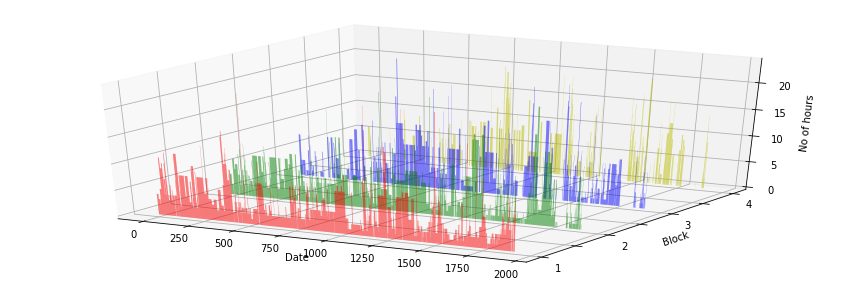

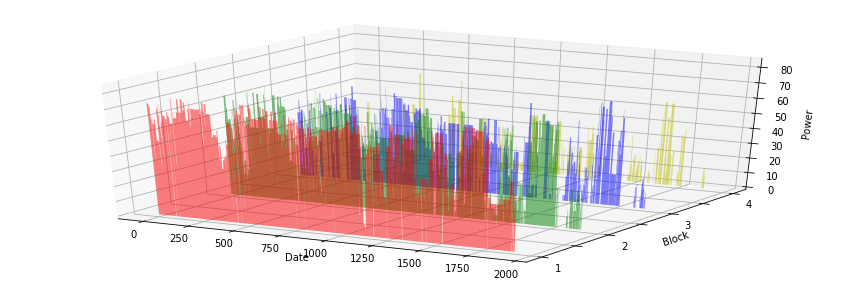

In [27]:
# plot power blocks in 3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

for blockType, zLabel in zip(["PrioH", "PrioP"], ["No of hours", "Power"]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for c, z in zip(['r', 'g', 'b', 'y'], [1,2,3,4]):
        xs = range(len(df.index)) #range(len(df.index)) #np.arange(20)
        ys = df[blockType+str(z)] #np.ones(len(df.index)) #np.round(df[z]) #np.random.rand(20)

        # You can provide either a single color or an array. To demonstrate this,
        # the first bar of each set will be colored cyan.
        cs = [c] * len(xs)
        cs[0] = 'c'
        ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8, linewidth=0)

    ax.set_xlabel('Date')
    ax.set_ylabel('Block')
    ax.set_zlabel(zLabel)
    ax.set_yticklabels(["","1", "","2", "","3","", "4"])

    plt.show()

In [ ]:
# plot power in 3D, along date and "hour of day" axes 

In [65]:
# helper function to make 24 hour vector out of blocks list
# returns a dataframe with 24 hours vectors as lines in a dataframe , from the blocks received as input
def get24hoursEnergyVector(prefixHour, prefixPower, dfInput, prefixOutputCols = ""):
    # create result dataframe
    resCols = []    
    dfResult = pd.DataFrame(index=dfInput.index, columns = [prefixOutputCols+str(i) for i in range(24)])
    
    for myIndex in dfInput.index:
        iVectorIndex = 0
        resVect = np.zeros(24)
        for iPair in range(1,4+1):
            NbHours = int(dfInput.loc[myIndex,prefixHour+str(iPair)])
            Power = dfInput.loc[myIndex,prefixPower+str(iPair)]   
            resVect[iVectorIndex:iVectorIndex+NbHours] = Power
            iVectorIndex = iVectorIndex + NbHours
        dfResult.loc[myIndex] = resVect  
    return dfResult

In [90]:
len(x)

24

In [147]:
yTicks

[]

In [151]:
x = range(24) #np.linspace(-6, 6, 30)
y = range(24) #df.index[(df.index>='2018-09-21') & (df.index<='2018-09-28')] 

X, Y = np.meshgrid(x, y)

dfvect24h = get24hoursEnergyVector("PrioH", "PrioP", df, prefixOutputCols = "P")
        
# create a table containing 24 x 7 power values
Z = np.zeros((len(y), len(x)))
yTicks = [(df.iloc[c+201,]["Date"]).strftime('%Y-%m-%d') for c in range(24)]
for yDate in y:
    for noHour in x:
        val = dfvect24h.iloc[yDate+201,]["P"+str(noHour)]
        Z[yDate, noHour] = val
Z.shape

(24, 24)

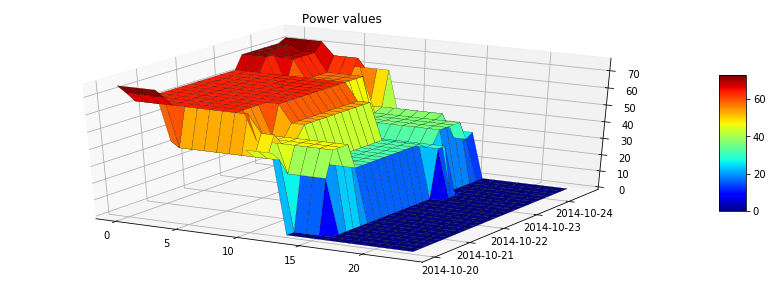

In [152]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=plt.cm.jet,  edgecolor='k', linewidth=0.2, antialiased=True)
ax.set_title('Power values');

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_yticklabels(yTicks)
plt.show()

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.

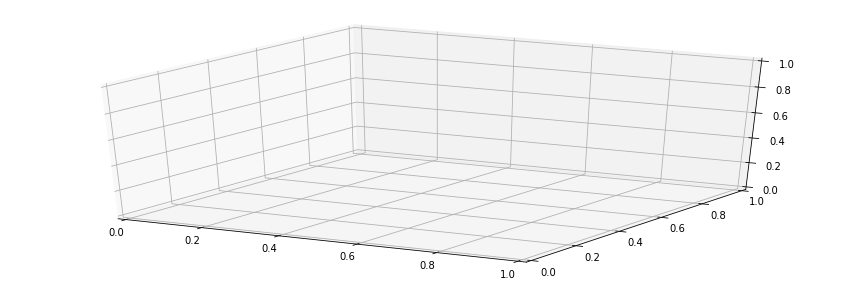

In [137]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

z = Z.flatten()

ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
ax.set_title('Power values');

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_yticklabels(yTicks)
plt.show()